In [1]:
## Import required modules
import matplotlib.pyplot as plt
import numpy as np

from dataset_generator import dataset_generator
import basic_nodes as nodes

In [2]:
## Datset preparation
dataset_gen = dataset_generator()

dataset_gen.set_coefficient([5, 0]) # y = 5x

x_data, y_data = dataset_gen.make_dataset()

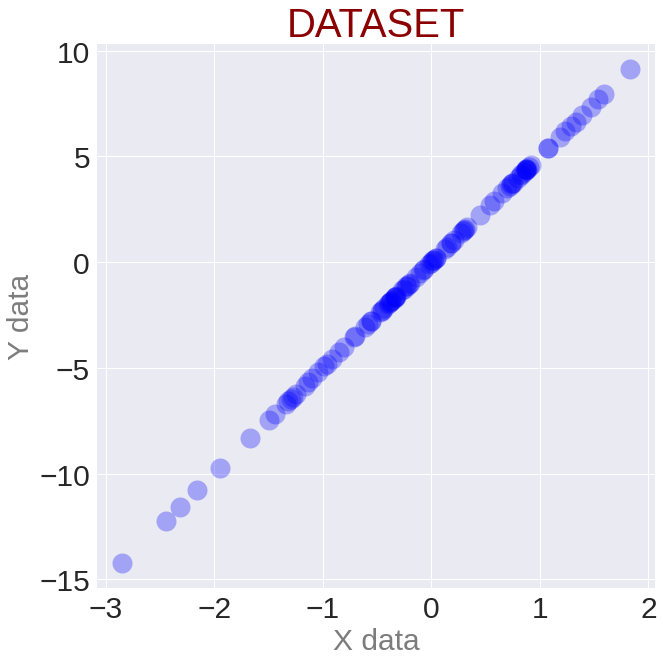

In [3]:
dataset_gen.dataset_visualizer()

In [4]:
## model implementation
node1 = nodes.mul_node()

## square error loss implementation
node2 = nodes.minus_node()
node3 = nodes.square_node()

In [5]:
## hyperparameter setting
epochs = 5 # total epoch setting
lr = 0.01 # learning rate setting

th = -1 # arbitrary theta

loss_list = []
th_list = []

In [6]:
## Learning process
for epoch in range(epochs):
    for data_idx in range(len(x_data)):
        x, y = x_data[data_idx], y_data[data_idx]
        
        z1 = node1.forward(th, x)
        z2 = node2.forward(y, z1)
        loss = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th = th - lr * dth
        
        th_list.append(th)
        loss_list.append(loss)

Text(0.5, 0, 'Iteration')

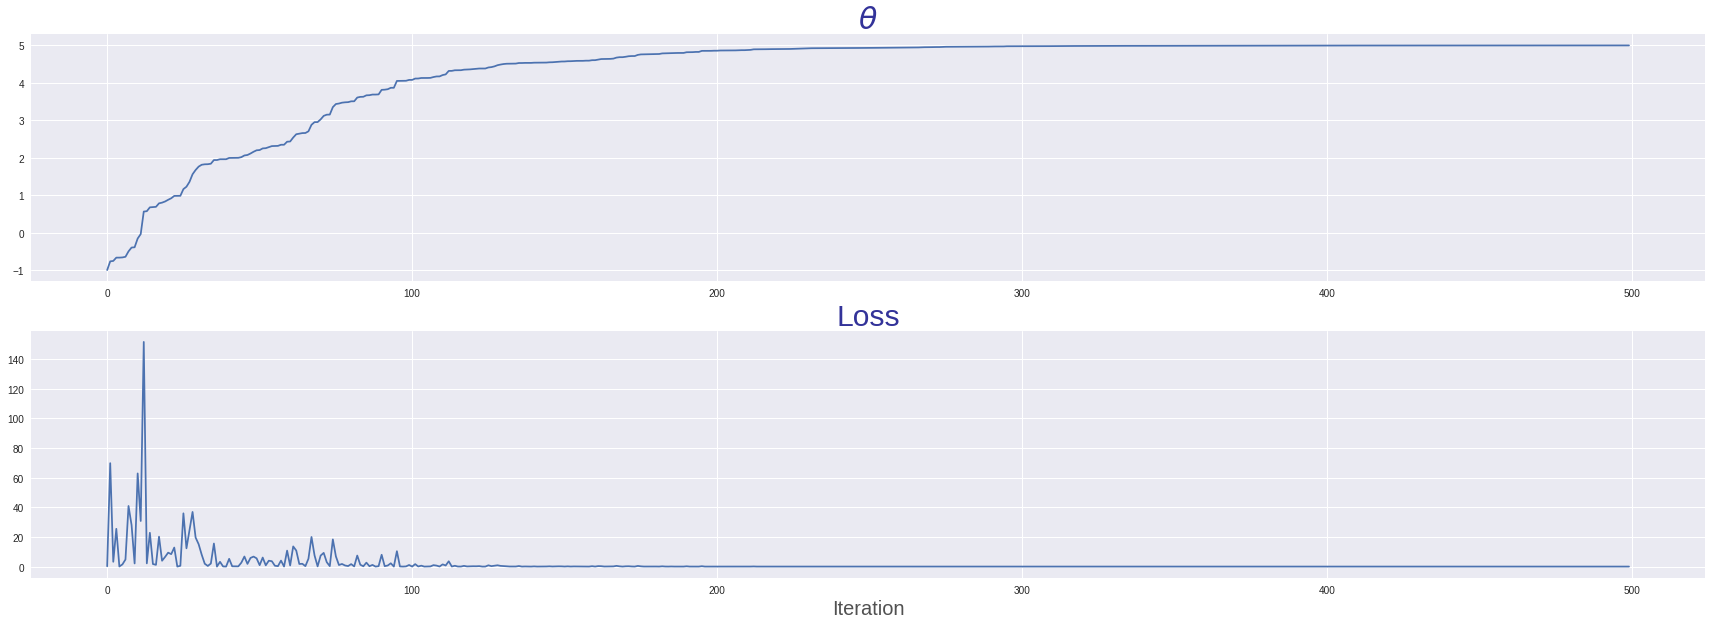

In [9]:
## Result Visualization

fig, ax = plt.subplots(2, 1, figsize = (30, 10))
ax[0].plot(th_list)
ax[1].plot(loss_list)

title_font = {'size':30, 'alpha':0.8, 'color':'navy'}
label_font = {'size':20, 'alpha':0.8}
plt.style.use('seaborn')

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title('Loss', fontdict = title_font)
ax[1].set_xlabel('Iteration', fontdict = label_font)


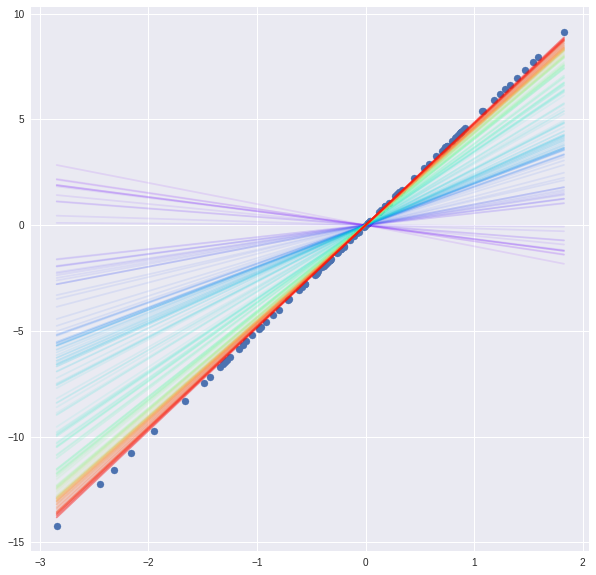

In [11]:
import matplotlib.cm as cm

N_line = 200
cmap = cm.get_cmap('rainbow', lut = N_line)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x_data, y_data)

test_th = th_list[:N_line]
x_range = np.array([np.min(x_data), np.max(x_data)])

for line_idx in range(N_line):
    pred_line = np.array([x_range[0] * test_th[line_idx],
                          x_range[1] * test_th[line_idx]])
    ax.plot(x_range, pred_line, color=cmap(line_idx, alpha=0.1))